In [3]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

ModuleNotFoundError: No module named 'fastbook'

In [4]:
pip install -Uqq fastbook

Note: you may need to restart the kernel to use updated packages.


In [1]:
import fastbook
fastbook.setup_book()

/Users/sunnykotwal/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/sunnykotwal/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/sunnykotwal/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.dylib provides version 14.0.0
  warn(f"Failed to load image Python extension: {e}")


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '99efae64248e4c1ba06647f98e9ec3c9')

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [5]:
results = search_images_bing(key, 'anime')
ims = results.attrgot('contentUrl')
len(ims)

150

In [6]:
dest = 'images/anime.jpg'
download_url(ims[0], dest)


Path('images/anime.jpg')

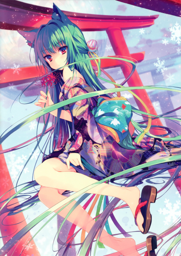

In [7]:
im = Image.open(dest)
im.to_thumb(256,256)

In [8]:
#bear_types = 'grizzly','black','teddy'
anime_types = 'shonen','Shojo','seinen'
#path = Path('bears')
path = Path('anime')

In [9]:
if not path.exists():
    path.mkdir()
    for o in anime_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} anime')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [10]:
fns = get_image_files(path)
fns

(#442) [Path('anime/Shojo/55ec9e35-b49f-4f25-9ecf-d31ab9c63744.jpg'),Path('anime/Shojo/b569a8c7-cfc8-4370-b64c-3b93d13982fb.png'),Path('anime/Shojo/deceefdb-de22-4c6f-91d5-d9102968e461.jpg'),Path('anime/Shojo/1ed27025-9003-48f8-ad63-c7571b620a08.jpg'),Path('anime/Shojo/f4afb7cd-67e4-4732-b50c-75e72e910e4d.jpg'),Path('anime/Shojo/64d1e1d7-c0b2-4a76-84cb-53731afc5b62.jpg'),Path('anime/Shojo/a12f9904-8a3f-4059-87fb-d37830aa6e73.jpg'),Path('anime/Shojo/035a7bc8-097b-40b7-99ee-877480c1b596.jpg'),Path('anime/Shojo/d7379f95-c0f7-4641-bf90-c662694b5ab0.jpg'),Path('anime/Shojo/a30053aa-2baf-4afe-b0f1-46a5158ba721.jpg')...]

In [11]:
failed = verify_images(fns)
failed

(#64) [Path('anime/Shojo/654d6bb3-15c4-4fed-a8f8-d0715d2ab0d3.png'),Path('anime/Shojo/7a7e5300-5f4f-4d5d-a8f7-36592b1b9340.jpg'),Path('anime/Shojo/35d96743-48e2-4f75-9e84-65aa30d6e056.jpg'),Path('anime/Shojo/8f264ac4-a9fd-4d04-92bc-a6b0d0732682.jpg'),Path('anime/Shojo/6f3b2ddc-ee62-44f5-9947-ff5009b64180.jpg'),Path('anime/Shojo/afd1fa18-fbd0-4f9c-b928-2557f27343b6.jpg'),Path('anime/Shojo/5c49ceaa-9c1c-4429-9876-51e90bc620cd.jpg'),Path('anime/Shojo/8a31ed64-76fb-45b0-b78c-f756bd785e3e.jpg'),Path('anime/Shojo/04d69a40-0bac-4865-b9d8-248d64af7a1f.jpg'),Path('anime/Shojo/ee994d0b-6778-40f3-a4b4-734185dfa12d.jpg')...]

In [12]:
failed.map(Path.unlink);

In [13]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [14]:
anime = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [15]:
dls = anime.dataloaders(path)

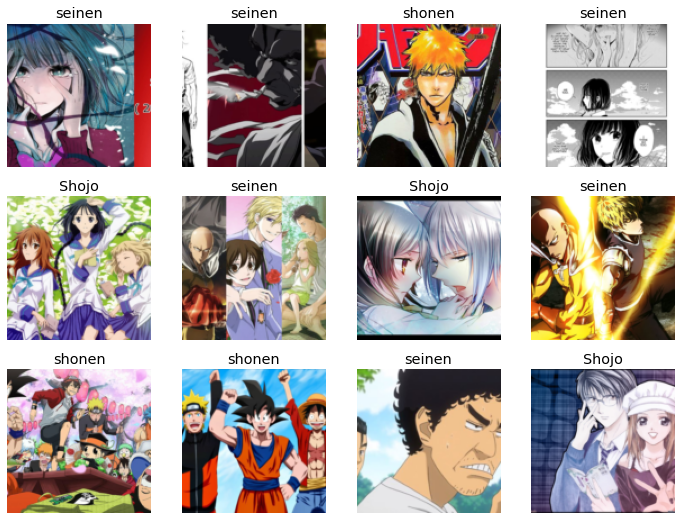

In [16]:
dls.valid.show_batch(max_n=12, nrows=3)

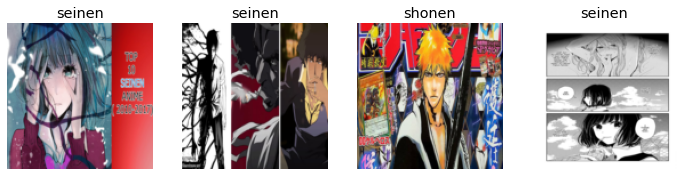

In [17]:
anime = anime.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = anime.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

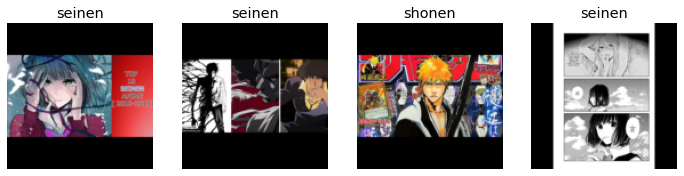

In [18]:
anime = anime.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = anime.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

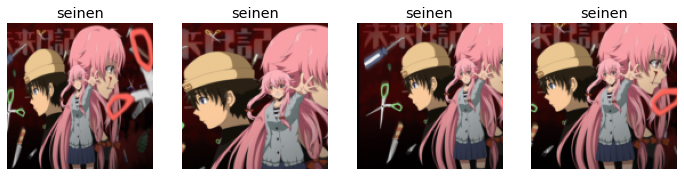

In [19]:
anime = anime.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = anime.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

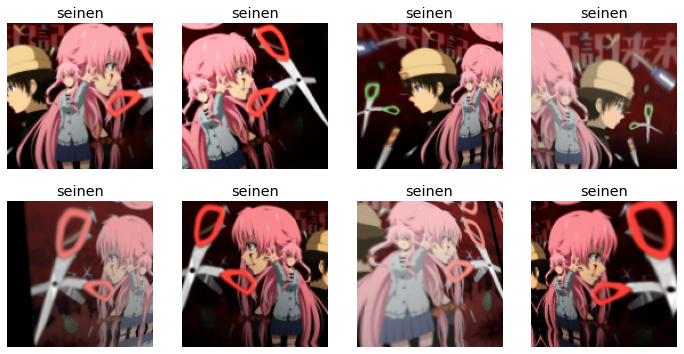

In [20]:
anime = anime.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = anime.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [21]:
anime = anime.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = anime.dataloaders(path)

In [22]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/Users/sunnykotwal/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/sunnykotwal/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/sunnykotwal/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.709511,1.503534,0.533333,00:31


epoch,train_loss,valid_loss,error_rate,time
0,1.088471,0.977862,0.306667,00:36
1,1.019728,0.802447,0.253333,00:38
2,0.863353,0.722116,0.240000,00:38
3,0.737611,0.633493,0.213333,00:37


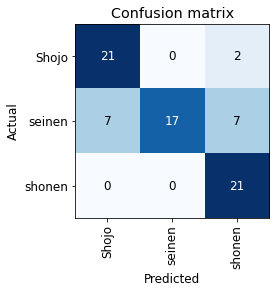

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

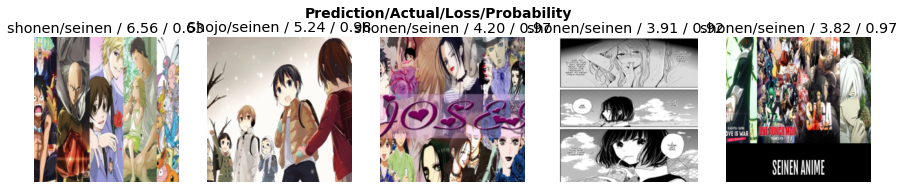

In [24]:
interp.plot_top_losses(5, nrows=1)

In [25]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [26]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [27]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [57]:
#saving file in pkl file: export.pkl"
learn.export()

In [29]:
#Let's check that the file exists, by using the ls method that fastai adds to Python's Path class:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [30]:
learn_inf = load_learner(path/'export.pkl')

In [35]:
learn_inf.predict('images/anime.jpg')

('Shojo', TensorBase(0), TensorBase([0.6411, 0.0012, 0.3576]))

In [36]:
learn_inf.dls.vocab

['Shojo', 'seinen', 'shonen']

In [37]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [38]:
# For the book, we can't actually click an upload button, so we fake it otherwise we actually upload 
btn_upload = SimpleNamespace(data = ['images/anime.jpg'])

In [39]:
img = PILImage.create(btn_upload.data[-1])

In [40]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [41]:
pred,pred_idx,probs = learn_inf.predict(img)


In [42]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Shojo; Probability: 0.6411')

In [43]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [44]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [45]:
btn_run

Button(description='Classify', style=ButtonStyle())

In [46]:
btn_upload = widgets.FileUpload()

In [47]:
VBox([widgets.Label('Select your anime!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [50]:
cat = ('shonen','Shojo','seinen')

def classify_img(img):
    pred,pred_idx,probs = learn_inf.predict(img)
    return dict(zip(cat, map(float,probs)))

In [52]:
classify_img('images/anime.jpg')

{'shonen': 0.6411365866661072,
 'Shojo': 0.0012140583712607622,
 'seinen': 0.35764938592910767}

In [54]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['004d198f-4307-4c94-800e-fa8a0427986d.jpg','035a7bc8-097b-40b7-99ee-877480c1b596.jpg','041a2ea1-6d05-4107-b08c-b14e56335d75.jpg']

intf = gr.Interface(fn=classify_image, inputs= image, outputs= label,examples = examples)
intf = gf.launch(incline=False)


NameError: name 'gr' is not defined